## Mean

The words “mean” and “average” are sometimes used interchangeably, but
I will maintain this distinction:
- The “mean” of a sample is the summary statistic computed with the formula: $$ \mu = \frac{1}{n} \sum_{i=0}^{n} x_i$$
- An “average” is one of many summary statistics you might choose to
  describe the typical value or the central tendency of a sample.

Suppose I grow several varieties in my
garden, and one day I harvest three decorative pumpkins that are 1 pound each, two pie pumpkins that are 3 pounds each, and one Atlantic Giant® pumpkin that weighs 591 pounds. The mean of this sample is 100
pounds, but if I told you “The average pumpkin in my garden is 100
pounds,” that would be wrong, or at least misleading.
In this example, there is no meaningful average because there is no typical
pumpkin.


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [102]:
df = pd.read_csv('Des_stats.csv')

In [103]:
df.head()

,Student #,Quiz Score,Unnamed: 2
0,1,85,NaN
1,2,66,NaN
2,3,90,NaN
3,4,82,NaN
4,5,74,NaN


In [104]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [130]:
df.head()

,Student #,Quiz Score
0,1,85
1,2,66
2,3,90
3,4,82
4,5,74


<BarContainer object of 20 artists>

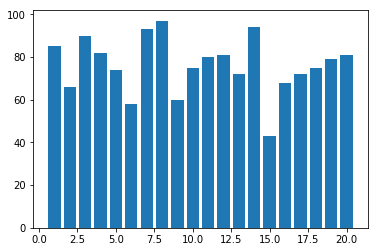

In [128]:
plt.bar(df['Student #'], df['\tQuiz Score'])

(array([1., 0., 1., 1., 2., 5., 2., 4., 1., 3.]),
 array([43. , 48.4, 53.8, 59.2, 64.6, 70. , 75.4, 80.8, 86.2, 91.6, 97. ]),
 <a list of 10 Patch objects>)

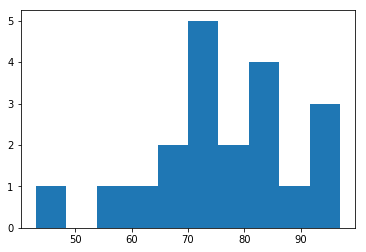

In [129]:
plt.hist(df['\tQuiz Score'])

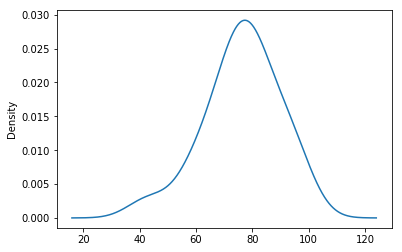

In [120]:
df['\tQuiz Score'].plot(kind='kde')

In [121]:
np.mean(df['\tQuiz Score'])

76.25

In [122]:
np.std(df['\tQuiz Score'])

12.86808066496321

In [123]:
np.var(df['\tQuiz Score'])

165.5875

In [126]:
df.columns

Index(['Student #', '\tQuiz Score'], dtype='object')

## Measures of Variability
- Variance
- Standard Deviation
- Coefficient of Variation

### Variance ($\sigma^2$)
In the same way that the mean is intended to describe the central tendency,
variance is intended to describe the **spread**. The variance of a set of values
is
Sample Variance = $$σ^2 = \frac{1}{n-1}\sum_{0}^{n}(xi − \bar{x})^2$$
Population Variance = $$σ^2 = \frac{1}{N}\sum_{0}^{N}(xi − µ)^2$$
- Variance measures the dispersion of a set fo data points around their mean.

The term **(xi-µ)** is called the “deviation from the mean,” so variance is the
mean squared deviation, which is why it is denoted σ^2
- The square root of variance, σ, is called the **standard deviation**.

In [168]:
np.var(df['\tQuiz Score'])

165.5875

### Standard Deviation ($\sigma$)
   - why Sample Std $\sqrt{\frac{1}{(n-1)}\sum_{0}^{n}(x_i - \bar{x})^2}$
   - why Population Std $\sqrt{\frac{1}{(N)}\sum_{0}^{n}(x_i - \mu)^2}$

Why so many Deviations:
- Mean Deviation
- Median Absolute Deviation

In [190]:
np.std(df['\tQuiz Score'])

12.86808066496321

### Coefficient of Variation ($C_v$)
or **Relative Standard Deviation**
- Standard Deviation is the most common measure of variability of single data set, comparing the standard deviations of two data sets is meaning less but comparing the coefficients of variation is not..
$$C_v =  \frac{Standard Deviation}{Mean} \times{100}$$
- Often expressed in Percentages
- E.g: Standard Deviation is 17% of Mean, the 17% is Coeffiecient of Variation


In [192]:
# Cost of pizzas in different currency at particualr 
# NY $ to Mexican Pesos.
# 1$ = 18.81 Pesos. [Exchange Rate]
usd_price = pd.Series([1.00,  2.00,  3.00,  3.00,  5.00,  6.00,  7.00,  8.00,  9.00, 11.00])
mxn_price = pd.Series([18.81 ,37.62 ,56.43 ,56.43 ,94.05 ,112.86, 131.67, 150.48, 169.29, 206.91])

piza_lst = [usd_price, mxn_price]
curr = ["$", "MXN"]
c_val = 0
for pl in piza_lst:
    print("Mean: ",pl.mean(),curr[c_val])
    print("Variance: ", pl.var(),curr[c_val],'^2')
    print("Standard Deviation: ", pl.std(),curr[c_val])
    print("\n")
    c_val += 1


Mean:  5.5 $
Variance:  10.722222222222221 $ ^2
Standard Deviation:  3.2744804507314167 $


Mean:  103.455 MXN
Variance:  3793.69485 MXN ^2
Standard Deviation:  61.59297727825795 MXN




In [193]:
# The Same pizza same Restarunts with diff currency value is having differnt Standard Deviations
# Now time to use Coefficient of Variation.
# C_v = Std/Mean
for pl in piza_lst:
    print("Coefficient of Variation: ", np.std(pl)/np.mean(pl))
    
# This does not have any Units.

Coefficient of Variation:  0.564808166073057
Coefficient of Variation:  0.564808166073057


Now We can Confidently say that two data sets have same variability
it's perfect to make comprassions.


## Measuring Skweness
Skweness indicates whether the data is concentrated on one side
it's about where the tail part extends towards
- positive skew = Right skew
- Negative skew = left skew
- zero skew = No skew


Formula to calculate skewness: $$\frac{
        \frac{1}{n}
        \sum _{i=0}^{n}(x_i - X)^3}
        {
        \sqrt{
        \frac{1}{n-1}\sum_{i=1}^{n}(x_i-X)
        }^3
        }$$
        
and 
        
$$\frac{3(Mean - Median)}{Standard Deviation}$$ also works

In [172]:
from scipy import stats

dataset_pos = pd.Series([1,1,1,1,2,2,2,2,2,2,3,3,3,3,4,4,5,5,7])
dataset_zero = pd.Series([1,1,2,2,3,3,3,4,4,4,4,4,5,5,5,6,6,7,7])
dataset_neg = pd.Series([1,2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,6,7,7,7])

print("Positve[Right] Skweness")
print("--"*10)
print("Mean: ", np.mean(dataset_pos))
print("Medain: ", np.median(dataset_pos))
print("Mode: ", stats.mode(dataset_pos)[0])
print("Mean > Median")
print("Skweness: ",stats.skew(dataset_pos))
print(" \n ")

print("Zero[No] Skweness")
print("--"*10)
print("Mean: ", np.mean(dataset_zero))
print("Medain: ", np.median(dataset_zero))
print("Mode: ", stats.mode(dataset_zero)[0])
print("Mean == Median")
print("Skweness: ",stats.skew(dataset_zero))
print(" \n ")

print("Negative[Left] Skweness")
print("--"*10)
print("Mean: ", np.mean(dataset_neg))
print("Medain: ", np.median(dataset_neg))
print("Mode: ", stats.mode(dataset_neg)[0])
print("Mean < Median")
print("Skweness: ",stats.skew(dataset_neg))
print(" \n ")

Positve[Right] Skweness
--------------------
Mean:  2.789473684210526
Medain:  2.0
Mode:  [2]
Mean > Median
Skweness:  0.9955182978601751
 
 
Zero[No] Skweness
--------------------
Mean:  4.0
Medain:  4.0
Mode:  [4]
Mean == Median
Skweness:  0.0
 
 
Negative[Left] Skweness
--------------------
Mean:  4.9
Medain:  5.0
Mode:  [6]
Mean < Median
Skweness:  -0.7234932151049145
 
 


In [163]:
def density_plot(ds):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean = ds.mean()
    median = ds.median()
    mode = ds.mode().get_values()[0]
    
    sns.boxplot(ds, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
    
    sns.distplot(ds, hist=True, kde=True, ax=ax_hist,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='b', linestyle='-')
    
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

    ax_box.set(xlabel='')
    plt.show()

-------------------- Positve[Right] Skweness --------------------


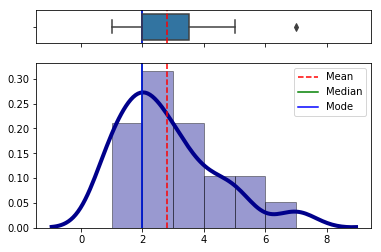

-------------------- Zero[No] Skweness --------------------


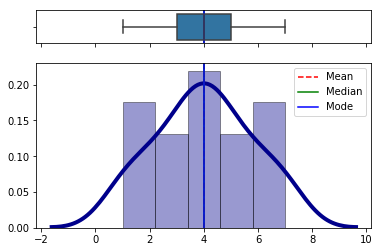

-------------------- Negative[Left] Skweness --------------------


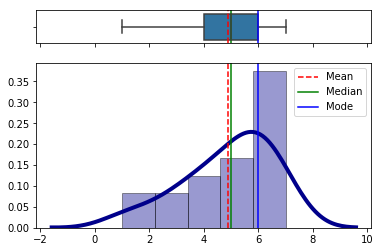

In [167]:
print("--"*10,"Positve[Right] Skweness","--"*10,)
density_plot(dataset_pos)
print("--"*10,"Zero[No] Skweness","--"*10,)
density_plot(dataset_zero)
print("--"*10,"Negative[Left] Skweness","--"*10,)
density_plot(dataset_neg)

## Covariance and Correlation
### Covariance
The covariance is a measure for how two variables are related to each other, i.e., how two variables vary with each other.
Let n be the population size, x and y two different features (variables), and μ the population mean; the covariance can then be formally defined as:[Population Formula]
$$Covariance\ (\sigma{xy}) = \frac{1}{N}\sum_{i=0}^{n}(x_i-\mu)(y_i-\mu)$$
- Covariance can be >0, 0 and <0
- the magnitude of the covariance depends on the scale of each variable (the size of the population or sample mean)
- Covariance gives senses of Direction
    - \>0: The two variables(features) move together
    - < 0: The two variables(features) move opposite direction
    - = 0: The two features are independent
- The one problem with Covariance is it could be a number like 1, 50, 500, 0.00032 this becomes hard to interpret

In [213]:
#Housing data to implement Covariance and Correlaiton
HData = [
    [650, 772000],
    [785, 998000],
    [120, 1200000],
    [720, 800000],
    [975, 895000]
]
hdata = pd.DataFrame(HData, columns=["Area_ft","Price_$"])


In [216]:
hdata.head()

,Area_ft,Price_$
0,650,772000
1,785,998000
2,120,1200000
3,720,800000
4,975,895000


In [221]:
print("\n----------- Calculating Covariance -----------\n")
print(hdata.cov())
 
print("\n----------- Between Area and Price -----------\n")
# Covariance of Area vs Price
print(hdata.Area_ft.cov(hdata['Price_$']))


----------- Calculating Covariance -----------

            Area_ft       Price_$
Area_ft    102412.5 -3.859875e+07
Price_$ -38598750.0  3.014200e+10

----------- Between Area and Price -----------

-38598750.0


As shown the value of covariance ranges all the way it's hard to interpret, 
and also, suppose feature x has a as unit and feature y has b as unit.
After applying the Covariance, the result will be in the units of *ab*.

### Correlation

Pearson’s ρ or “r” (or typically just called “correlation coefficient”) is measures the linear correlation between two features and is closely related to the covariance. In fact, it’s a normalized version of the covariance:
$$\rho = \frac{Cov(x,y)}{std(x)\times std(y)} = \frac{\sum_{i=1}^{n}[(x_i-\mu_x)(y_i-\mu_y)]}{\sqrt{\sum_{i=1}^{n}(x_i-\mu_x)^2}\sqrt{\sum_{i=1}^{n}(y_i-\mu_y)^2}} = \frac{\rho_{xy}}{\rho_{x}\rho_{y}}$$

- Correlaiton adjusts covariance, so that the relationship between two variables becomes easy and intutive to interpret
- -1 <= Correlation Coefficient <= 1


In [227]:
np.corrcoef(hdata['Area_ft'], hdata['Price_$'])

array([[ 1.        , -0.69472147],
       [-0.69472147,  1.        ]])

In [234]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(hdata['Area_ft'], hdata['Price_$'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.695


We manipulated the strange covariance value (-38598750.0) to get something intuitive.
